<a href="https://colab.research.google.com/github/itsGab/previsao_uti_em_covid/blob/main/notebooks/2_TRATAMENTO_limpando_e_trantando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Previsão de Admissão por COVID-19</h1>
<h2 align='center'>Notebook de Limpeza e Tratamento dos Dados</h2>

# LINKS

[Repositório](https://github.com/itsGab/previsao_uti_em_covid)

[Notebook de análise exploratória](https://github.com/itsGab/previsao_uti_em_covid/blob/main/notebooks/analise_exploratoria.ipynb)

[Desafio Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

# IMPORTAÇÕES (data & libs)

In [22]:
# imports
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

import warnings
warnings.filterwarnings('ignore')

# importação dos dados
data_raw = 'https://github.com/itsGab/previsao_uti_em_covid/blob/main/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'
info_col = 'https://github.com/itsGab/previsao_uti_em_covid/raw/main/dados/Colunas_por_tipo'

# FUNÇÕES

In [23]:
def preparando_janela(grupo):
    ''' Preparar primeira janela com a marcador da variável alvo. '''
    if any(grupo['ICU']):
        grupo.loc[grupo['WINDOW'] == '0-2', 'ICU'] = 1
    return grupo


def arrumando_listas(lista):
    ''' As listas foram salvas como string, fiz esse função para transformar em
    listas novamento. '''
    caracteres = "[],'"
    for caracter in caracteres:
        lista = lista.replace(caracter, '')
    return lista.split(' ')



# ABRINDO O CONJUNTO DE DADOS


In [24]:
# Lendo os dados com pandas
df = pd.read_excel(data_raw)

# removendo espaco no nome das colunas
df.columns = df.columns.str.replace(' ', '_')

# abrindo lista de colunas por tipo
s_colunas = pd.read_csv(info_col, squeeze=True, index_col=0)
s_colunas = s_colunas.apply(arrumando_listas)

# mostrando cabeçalho do dataframe
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [25]:
s_colunas

informativas                      [PATIENT_VISIT_IDENTIFIER, WINDOW, ICU]
demograficas                         [AGE_ABOVE65, AGE_PERCENTIL, GENDER]
comorbidades            [DISEASE_GROUPING_1, DISEASE_GROUPING_2, DISEA...
sinais_vitais           [BLOODPRESSURE_DIASTOLIC_MEAN, BLOODPRESSURE_S...
exames_laboratoriais    [ALBUMIN_MEDIAN, ALBUMIN_MEAN, ALBUMIN_MIN, AL...
Name: Colunas_por_tipo, dtype: object



Separação de colunas por tipo do dados:

| nome da variável | descrição | 
|---|---|
| informativas | identificador, janela e uti |
| demograficos | faixa etária e sexo |
| comorbidades | grupos de doenças |
| sinais_vitais| sinais vitais `iloc[:, 193:-2]`|
| exames_laboratoriais | exames laboratoriais `iloc[:, 13:193]`| 


# INFORMAÇÕES

In [26]:
# Mostrando informações do DataFrame
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [27]:
# Numero de PATIENT_VISIT_IDENTIFIER unicos (ou numero de pacientes unicos)
df['PATIENT_VISIT_IDENTIFIER'].nunique()

385

<h3 align='center'> Informações: </h3>

| Info | Descrição |
|--|--|
| Nº de colunas | 231 |
| Nº de linhas | 1925 | 
| Data types| ["float64(225)", "int64(4)", "object(2)"] |
| Nº de pacientes | 385 |  

In [28]:
# Estatísticas descritivas
pd.set_option('display.max_columns', None)
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821

# TRATAMENTO


### CONCEITOS E AÇÃO:

1. Cuidado para NÃO usar os dados quando a variável de alvo (‘ICU’ = 1) estiver presente, pois a ordem do evento é desconhecida (talvez o evento de destino tenha acontecido antes de os resultados serem obtidos). Eles foram mantidos lá para que possamos aumentar este conjunto de dados em outros resultados posteriormente.

        Ação: Limpeza dos Pacientes que foram pra UTI na primeira janela.


2. A identificação precoce dos pacientes que desenvolverão um curso adverso da doença (e precisam de cuidados intensivos) é a chave para um tratamento adequado (salvar vidas) e para gerenciar leitos e recursos. O modelo usando apenas o primeiro (0-2) provavelmente será mais clinicamente relevante.

        Ação: Preparar a primeira janela (0-2). Marcando a variável alvo de pacientes que precisam da UTI.

3. Um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia entre os diferentes tipos de medições. Por exemplo, os sinais vitais são coletados com mais frequência (geralmente de hora em hora) do que os laboratórios de sangue (geralmente diariamente). É sensato supor que um paciente que não tem uma medição registrada em uma janela de tempo esteja clinicamente estável, podendo apresentar sinais vitais e exames de sangue semelhantes às janelas vizinhas. Portanto, pode-se preencher os valores ausentes usando a entrada seguinte ou anterior.

        Ação: Preencher valores faltantes com backfill, desconsiderando casos que já tenham entrado na UTI.

4. Atenção aos problemas de multicolinearidade e variância zero nesses dados ao escolher seu algoritmo.

        Ação: Remover as colunas com alta correlação

## MISSING VALUES (VALORES FALTANTES)

In [29]:
# Listando os pacientes que entraram na uti na primeira janela (0 a 2 horas)
lista_pacientes_uti_primeira_janela = df.query('WINDOW == "0-2" & ICU == 1').index.tolist()

# Mantendo apenas os pacientes que não estão na lista de entrada na primeira janela.
df_tratado = df.query('PATIENT_VISIT_IDENTIFIER not in @lista_pacientes_uti_primeira_janela')

In [30]:
# Aplicando função de preparar primeira janela com a marcador da variável alvo.
df_tratado = df_tratado.groupby('PATIENT_VISIT_IDENTIFIER').apply(preparando_janela)

# Indentificando e removendo linhas que:
# Janelas diferente da primeira ('0-2') e que já tiveram admissão na UTI
index_linhas_remover = df_tratado.query('WINDOW != "0-2" & ICU == 1').index.tolist()
df_tratado = df_tratado.drop(index=index_linhas_remover)

In [31]:
# Quantidade de linhas com valores faltantes (missing values) ANTES do tratamento
n_linhas_sem_prenche = df_tratado.query('WINDOW == "0-2"').dropna().describe().loc['count', :]['PATIENT_VISIT_IDENTIFIER']

# Realizando o tratamento e preenchimento
df_tratado.update(df_tratado.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False).fillna(method='bfill', axis=0))
df_tratado = df_tratado.query('WINDOW == "0-2"').dropna()

# Quantidade de linhas com valores faltantes (missing values) APÓS do tratamento
n_linhas_com_prenche = df_tratado.dropna().describe().loc['count', :]['PATIENT_VISIT_IDENTIFIER']

# Calculando as porcentagens de linhas comparado ao df_inical
n_pacientes = df['PATIENT_VISIT_IDENTIFIER'].nunique()
p1 = n_linhas_sem_prenche/n_pacientes
p2 = n_linhas_com_prenche/n_pacientes
p1, p2

(0.10909090909090909, 0.7688311688311689)

Aqui é possível notar que, caso não seja feito o preenchimento dos dados NaN com o metodo "backfill", ou seja, preencher com o próximo valor válido, na hora de descartar as colunas que ainda tenham algum NaN ficariamos com apenas 42 válidos de um total de 385. Já com todo o tratamento e o uso do "backfill" foi possível ficar com 296 pacientes válidos.

|Método de Tratamento| % de Pacientes Válidos| Qtd. Pacientes Válidos |
|--|--|--|
|Sem Backfill| 10.9 % | 42 |
|Com Backfill| 76.9 %| 296 |

In [32]:
# Transformando dados categoricas binarios em integer
for col in df_tratado.columns:
    if len(df_tratado[col].unique()) == 2:
        df_tratado[col] = df_tratado[col].astype('int64')

# Mostrando cabeçalho dos dados tratados
df_tratado.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0,0,0,0,1,1,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.868365,-0.868365,-1.0,-0.742004,-0.742004,-0.742004,-0.742

## CORRELAÇÃO
Removendo **correlação muito alta** de exames e sinais vitiais (variaveis continuas)

In [33]:
# Juntando as colunas de exames laboratoriais com as de sinais vistais
cols_exames_e_vitais = s_colunas['exames_laboratoriais'] + s_colunas['sinais_vitais']

# Mostrando as correlações que aparecem em colunas derivadas
df_tratado[cols_exames_e_vitais].corr().iloc[:10, :10]

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF
ALBUMIN_MEDIAN,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_MEAN,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_MIN,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_MAX,1.000000,1.000000,1.000000,1.000000,NaN,-0.124288,-0.124288,-0.124288,-0.124288,NaN
ALBUMIN_DIFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE_ARTERIAL_MEDIAN,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_MEAN,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_MIN,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_MAX,-0.124288,-0.124288,-0.124288,-0.124288,NaN,1.000000,1.000000,1.000000,1.000000,NaN
BE_ARTERIAL_DIFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


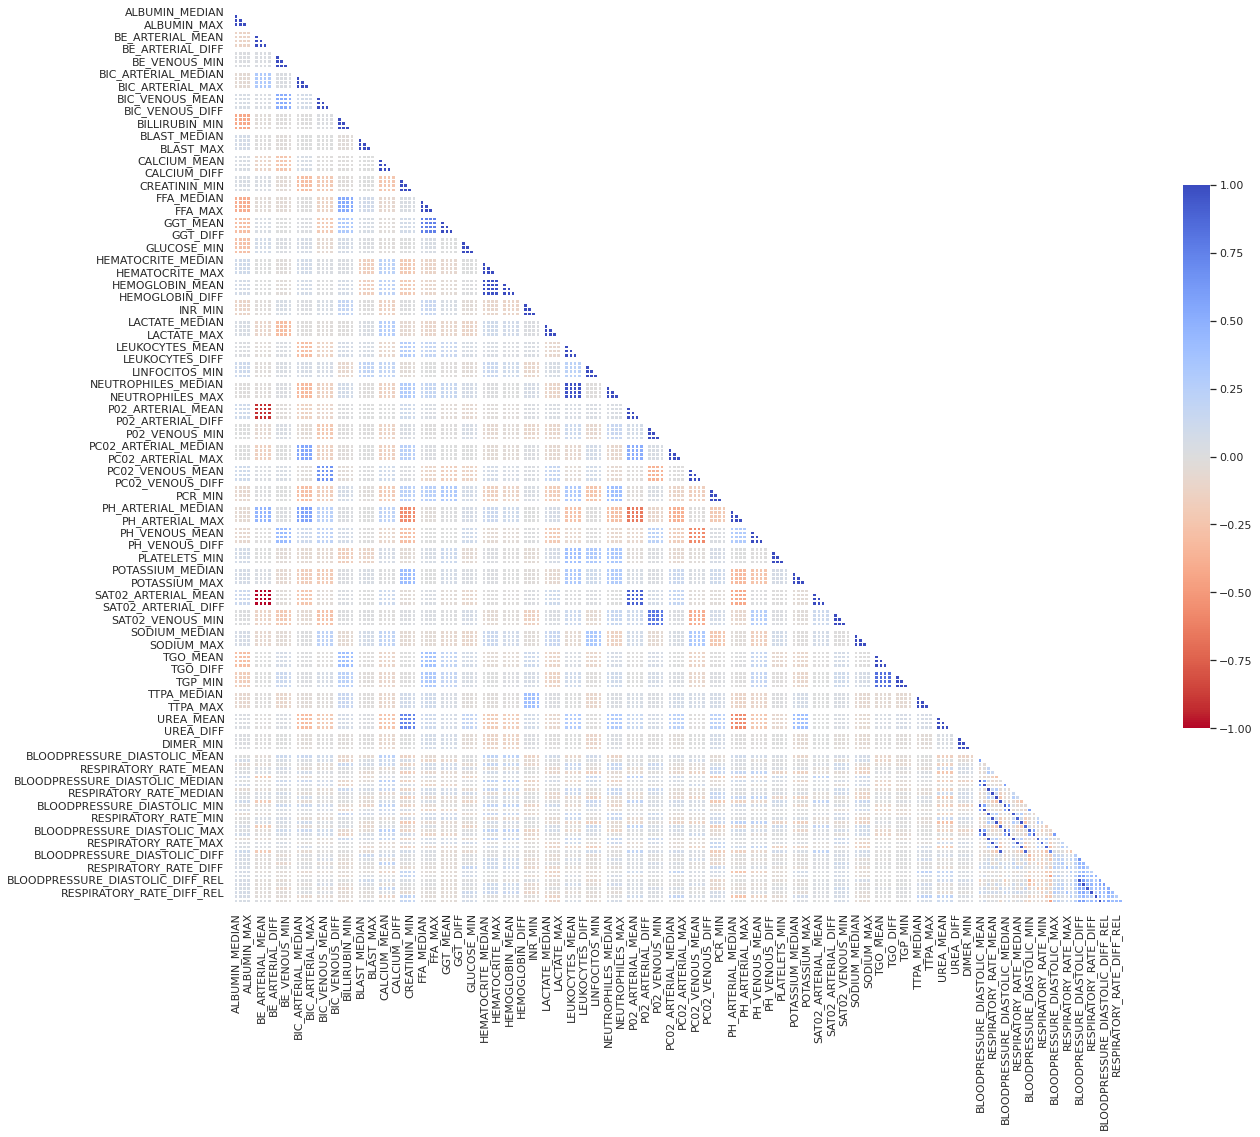

In [34]:
# Plotando MAPA DE CALOR da correlação entre colunas

# Computando a correlaçãoda matrix
matrix_corr = df_tratado[cols_exames_e_vitais].corr()

# Gerando a mascara para a parte superior do triangulo
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))

# Settando paramentros e plotando o mapa de calor (heatmap)
# tamanho da figura
f, ax = plt.subplots(figsize=(20, 20))
# mapa de cores do mapa de calor
cmap = sns.color_palette("coolwarm_r", as_cmap=True)
# plot do mapa de calor
sns.heatmap(matrix_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

No Mapa de calor acima é possível ter uma idéia do nível de correlação de algumas colunas pelas cores mais saturadas, sendo o **Azul** para correlação diretamente proporcional e o **Vermelho** para correlação inversamento proporcional. 

TAXA DE CORTE DE CORRELAÇÃO MAIOR QUE 0,90

In [35]:
# Computando a triangulo da matrix de correlação absoluta
matrix_corr_abs = matrix_corr.mask(mask).abs()

# Listando as colunas com alta correlação ou sem variancia
taxa_corte_corr = 0.90
excluir_cols = [col for col in matrix_corr_abs.columns if any(matrix_corr_abs[col]>taxa_corte_corr) or matrix_corr_abs[col].sum() == 0]

# Listando colunas exames e sinais vitais usaveis
cols_exames_e_vitais_usaveis = [col for col in cols_exames_e_vitais if col not in excluir_cols]

# Informações sobre as colunas usáveis e as originais
n_usaveis = len(cols_exames_e_vitais_usaveis)
n_originais = len(cols_exames_e_vitais)
diferenca = n_originais - n_usaveis
print(f'Coluna de Exames Lab. & Sinais Vitais\n'
f'No. Colunas Originais:   {n_originais}\n'
f'No. Colunas Usaveis:      {n_usaveis}\n'
f'Diferenca:               {diferenca}')

Coluna de Exames Lab. & Sinais Vitais
No. Colunas Originais:   216
No. Colunas Usaveis:      47
Diferenca:               169


In [36]:
# Selecionando colunas usaveis

# Listando todas as colunas usaveis
cols_usaveis = s_colunas['informativas'] + s_colunas['demograficas'] + s_colunas['comorbidades'] + cols_exames_e_vitais_usaveis

# Fatiando DataFrame com colunas usaveis
df_tratado_sem_corr = df_tratado[cols_usaveis]

# Mostrando formato e cabeçalho do dataframe sem corr maior que 0.90
display(df_tratado_sem_corr.shape)
df_tratado_sem_corr.head()

(296, 62)

,PATIENT_VISIT_IDENTIFIER,WINDOW,ICU,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,BE_VENOUS_MAX,BIC_ARTERIAL_MAX,BIC_VENOUS_MAX,BILLIRUBIN_MAX,BLAST_MAX,CALCIUM_MAX,CREATININ_MAX,FFA_MAX,GGT_MAX,GLUCOSE_MAX,HEMOGLOBIN_MAX,INR_MAX,LACTATE_MAX,LINFOCITOS_MAX,NEUTROPHILES_MAX,P02_VENOUS_MAX,PC02_ARTERIAL_MAX,PC02_VENOUS_MAX,PCR_MAX,PH_ARTERIAL_MAX,PH_VENOUS_MAX,PLATELETS_MAX,POTASSIUM_MAX,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MAX,SODIUM_MAX,TGO_MAX,TGP_MAX,TTPA_MAX,UREA_MAX,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL
0,0,0-2,1,1,60th,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.109756,-0.932246,1.000000,-0.914938,-0.868747,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.237113,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
10,2,0-2,1,0,10th,0,0,0,0,0,0,0,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.158537,-0.959849,1.000000,-0.908714,-0.412965,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.525773,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000
15,3,0-2,0,0,40th,1,0,0,0,0,0,0,0,1,1,-0.263158,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.219512,-0.959849,-0.828421,-0.836100,-0.784714,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.175258,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
20,4,0-2,0,0,10th,0,0,0,0,0,0,0,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.304878,-0.959849,1.000000,-0.641079,-0.812725,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.443299,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536
30,6,0-2,0,1,70th,1,0,0,0,0,0,0,0,1,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.944798,-0.742004,-0.958528,-0.891993,-0.475610,-0.959849,1.000000,-0.858921,-0.947579,-0.704142,-0.77931,-0.754601,-0.750095,0.234043,0.363636,-0.636849,-0.962963,0.939394,0.345679,-0.257143,-0.995428,-0.986662,-0.846633,-0.951807,-0.978029,-0.010309,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


## DTYPES 'OBJECTS'

In [37]:
# Verificando e mostrando os 10 primeiros
df_tratado_sem_corr.select_dtypes('object').T.iloc[:, :10]

,0,10,15,20,30,35,40,45,50,55
WINDOW,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
AGE_PERCENTIL,60th,10th,40th,10th,70th,20th,50th,80th,80th,80th


**Window**: Não temos variação de **Janelas** e não iremos usar ela no nosso modelo de previsão, então só iremos remover dos dados

**Age percentil**: Iremos transformar em categóricos




### WINDOW

In [38]:
# Removendo WINDOW
df_tratado_sem_corr = df_tratado_sem_corr.drop('WINDOW', axis=1)

### AGE PERCENTIL

In [39]:
# Transformando age percentil em dados categoricos
col_age_percentil_original = df_tratado_sem_corr['AGE_PERCENTIL']
col_age_percentil_catcodes = df_tratado_sem_corr['AGE_PERCENTIL'].astype('category').cat.codes
df_tratado_sem_corr['AGE_PERCENTIL'] = col_age_percentil_catcodes

# Mostrando o dicionarios categorico de age percentil
dicio_age_percentil = {col_age_percentil_catcodes.iloc[id]: valor for id, valor in enumerate(col_age_percentil_original)}
dicio_age_percentil

{0: '10th',
 1: '20th',
 2: '30th',
 3: '40th',
 4: '50th',
 5: '60th',
 6: '70th',
 7: '80th',
 8: '90th',
 9: 'Above 90th'}

Outra possibilidade seria usar o `pd.get_dummies()`, mas optei por usar os **códigos categóricos**

### CORR AGE_PERCENTIL x AGE_ABOVE65

Correlação entre AGE_PERCENTIL e AGE_ABOVE65

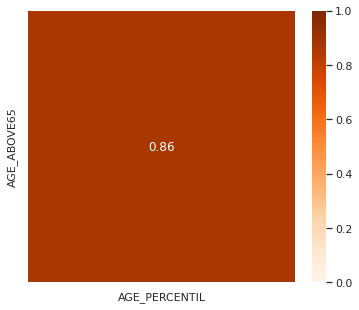

In [40]:
# Dando um olhada na correlação
matrix_temp = df_tratado_sem_corr[['AGE_PERCENTIL', 'AGE_ABOVE65']].corr()
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(matrix_temp.loc[['AGE_ABOVE65'], ['AGE_PERCENTIL']], vmin=0, 
            vmax=1, annot=True, cmap='Oranges')
plt.show()

Talvez, com uma correlação de 0,86, seja interessante analisar se há interferência no modelo (positiva, negativo ou nao há) e qual das duas colunas faz mais sentido manter.

## PACIENT_VISIT_IDENTIFIER COMO INDICE

Como só temos um linha por index, vamos utilizar o identificador como indice (index)

In [41]:
# Usando ID como indice
df_tratado_sem_corr.set_index('PATIENT_VISIT_IDENTIFIER', inplace=True)
df_tratado_sem_corr.head()

,ICU,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,BE_VENOUS_MAX,BIC_ARTERIAL_MAX,BIC_VENOUS_MAX,BILLIRUBIN_MAX,BLAST_MAX,CALCIUM_MAX,CREATININ_MAX,FFA_MAX,GGT_MAX,GLUCOSE_MAX,HEMOGLOBIN_MAX,INR_MAX,LACTATE_MAX,LINFOCITOS_MAX,NEUTROPHILES_MAX,P02_VENOUS_MAX,PC02_ARTERIAL_MAX,PC02_VENOUS_MAX,PCR_MAX,PH_ARTERIAL_MAX,PH_VENOUS_MAX,PLATELETS_MAX,POTASSIUM_MAX,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MAX,SODIUM_MAX,TGO_MAX,TGP_MAX,TTPA_MAX,UREA_MAX,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,5,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.109756,-0.932246,1.000000,-0.914938,-0.868747,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.237113,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.158537,-0.959849,1.000000,-0.908714,-0.412965,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.525773,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000
3,0,0,3,1,0,0,0,0,0,0,0,1,1,-0.263158,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.219512,-0.959849,-0.828421,-0.836100,-0.784714,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.175258,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.304878,-0.959849,1.000000,-0.641079,-0.812725,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.443299,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536
6,0,1,6,1,0,0,0,0,0,0,0,1,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.944798,-0.742004,-0.958528,-0.891993,-0.475610,-0.959849,1.000000,-0.858921,-0.947579,-0.704142,-0.77931,-0.754601,-0.750095,0.234043,0.363636,-0.636849,-0.962963,0.939394,0.345679,-0.257143,-0.995428,-0.986662,-0.846633,-0.951807,-0.978029,-0.010309,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


# SALVANDO

In [42]:
# Salvando o DataFrame como arquvivo CSV
df_tratado_sem_corr.to_csv('Dados_limpos')

Os dados foram salvos e feito upload no [repositório do Github](https://github.com/itsGab/previsao_uti_em_covid/tree/main/dados)